## Course Assignment Instructions
You should have Python (version 3.8 or later) and Jupyter Notebook installed to complete this assignment. You will write code in the empty cell/cells below the problem. While most of this will be a programming assignment, some questions will ask you to "write a few sentences" in markdown cells. 

Submission Instructions:

Create a labs directory in your personal class repository (e.g., located in your home directory)
Clone the class repository
Copy this Jupyter notebook file (.ipynb) into your repo/labs directory
Make your edits, commit changes, and push to your repository
All submissions must be pushed before the due date to avoid late penalties. 

Labs are graded out of a 100 pts. Each day late is -10. For a max penalty of -50 after 5 days. From there you may submit the lab anytime before the semester ends for a max score of 50.  

Lab 6 is due on 3/24/2025

#Visualization in Python

Load up the `GSSvocab.csv` dataset into a pandas dataframe and and drop the rows with missing values.

In [1]:
import pandas as pd


df = pd.read_csv("GSSvocab.csv")

df.info()
df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27360 entries, 0 to 27359
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        27360 non-null  int64 
 1   gender      27360 non-null  object
 2   nativeBorn  27360 non-null  object
 3   ageGroup    27360 non-null  object
 4   educGroup   27360 non-null  object
 5   vocab       27360 non-null  int64 
 6   age         27360 non-null  int64 
 7   educ        27360 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 1.7+ MB


,year,gender,nativeBorn,ageGroup,educGroup,vocab,age,educ
0,1978,female,yes,50-59,12 yrs,10,52,12
1,1978,female,yes,60+,<12 yrs,6,74,9
2,1978,male,yes,30-39,<12 yrs,4,35,10
3,1978,female,yes,50-59,12 yrs,9,50,12
4,1978,female,yes,40-49,12 yrs,6,41,12
...,...,...,...,...,...,...,...,...
27355,2016,female,yes,60+,13-15 yrs,6,68,13
27356,2016,female,no,50-59,>16 yrs,8,57,20
27357,2016,male,yes,60+,13-15 yrs,7,77,15
27358,2016,female,yes,60+,13-15 yrs,9,87,14


What is the data type of each variable? What do you think is the response variable the collectors of this data had in mind?

Year, vocab, age and educ are 

Create two different plots and identify the best-looking plot you can to examine the `age` variable. Save the best looking plot as an appropriately-named PDF.

Using plotnine

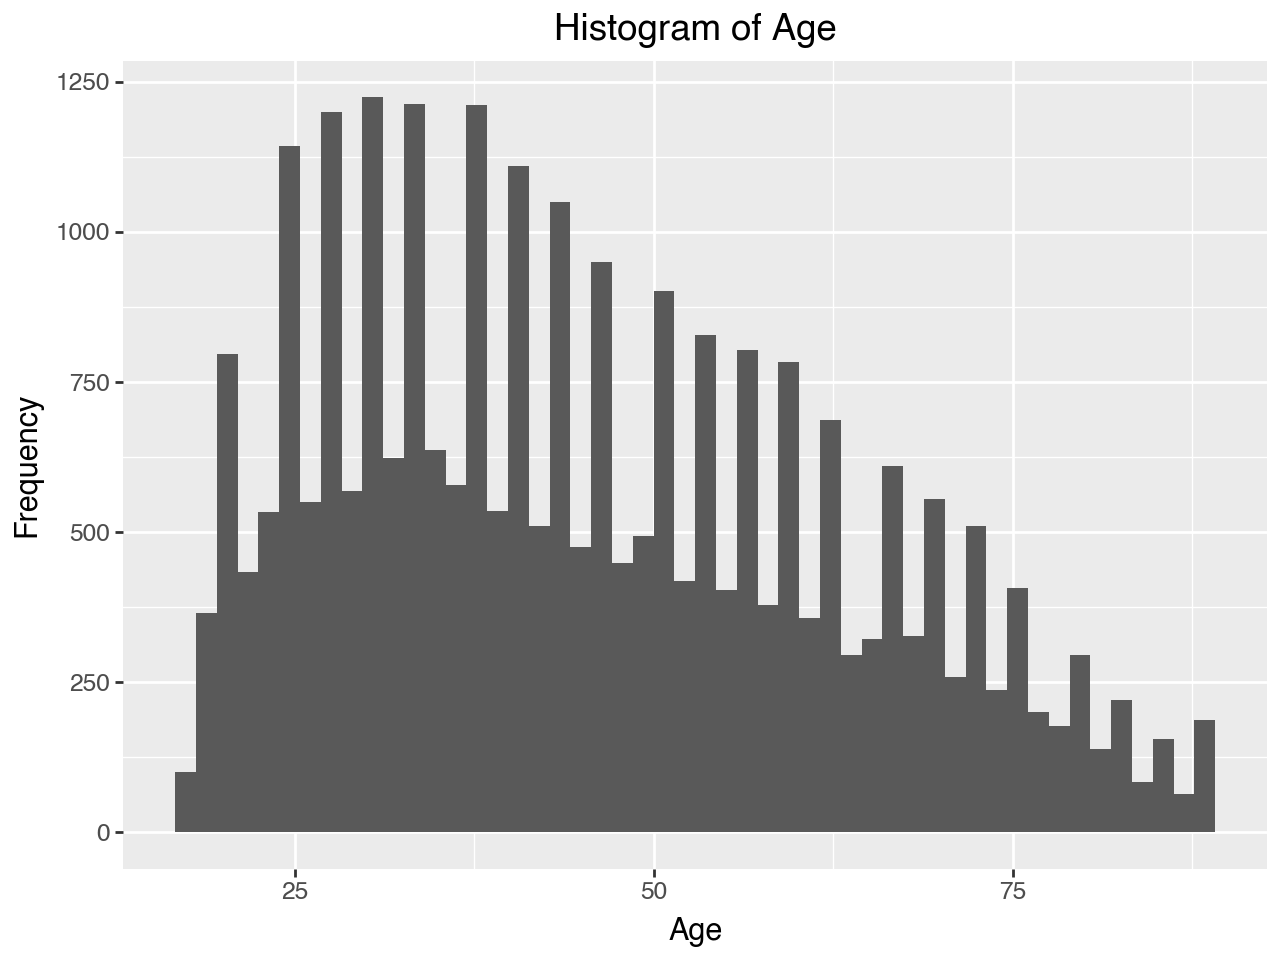

In [2]:
from plotnine import ggplot, aes, geom_histogram, geom_density, labs, ggsave

# Plot 1: Histogram of age with 50 bins
hist_plot = (
    ggplot(df, aes(x='age')) +
    geom_histogram(bins=50) +
    labs(x='Age', y='Frequency', title='Histogram of Age')
)

# Plot 2: Density plot of age with blue fill
density_plot = (
    ggplot(df, aes(x='age')) +
    geom_density(fill="blue") +
    labs(x='Age', y='Frequency', title='Density Plot of Age')
)

# Display the plots (if using an interactive environment, they will be rendered)
hist_plot

Display second plot

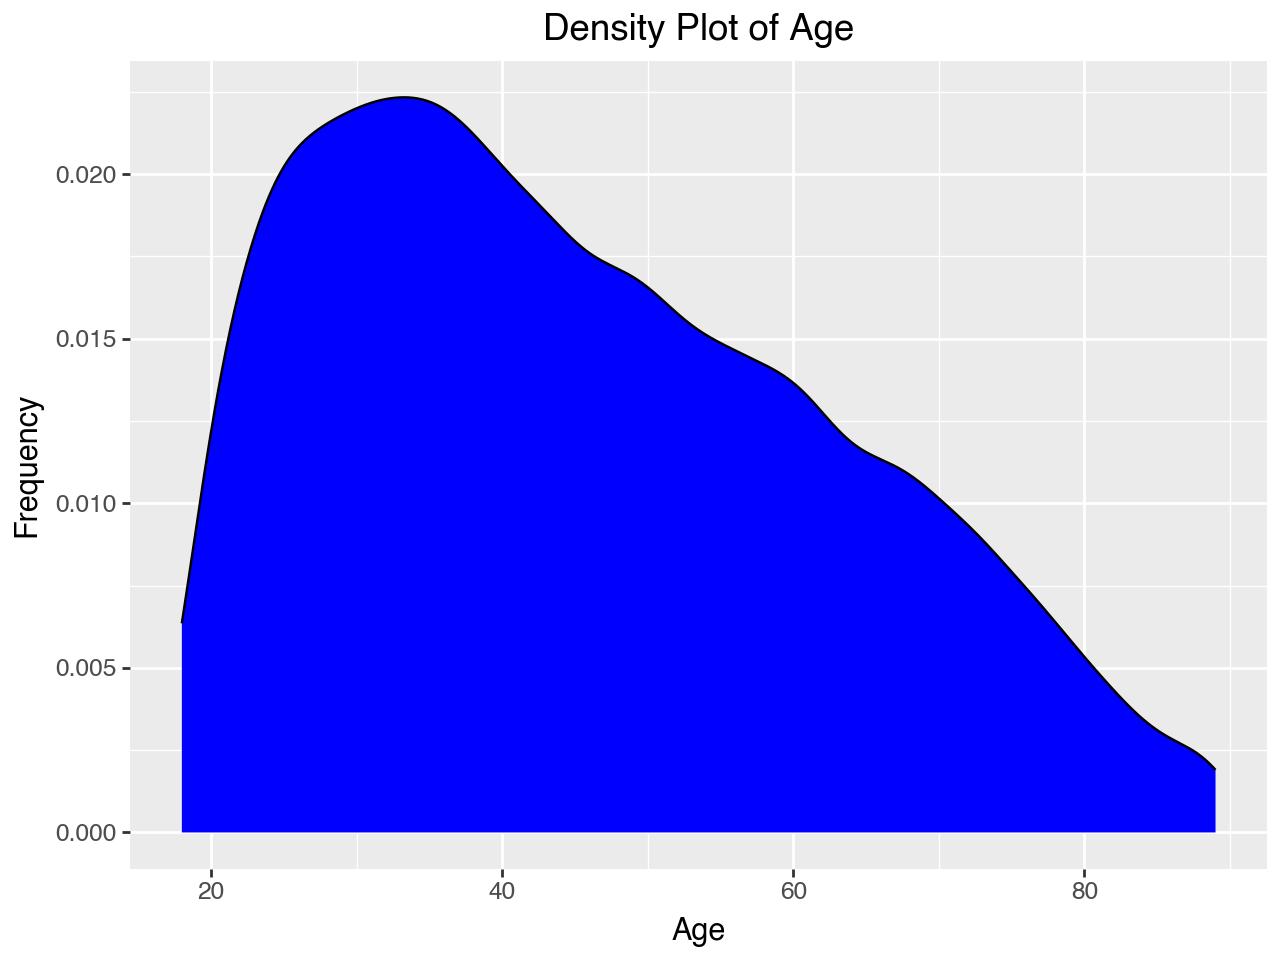

In [3]:
density_plot

Save the best one

In [4]:
density_plot.save(filename="density_plot.png")

/opt/anaconda3/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/anaconda3/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: density_plot.png


Using Seaborn and Matplotlib

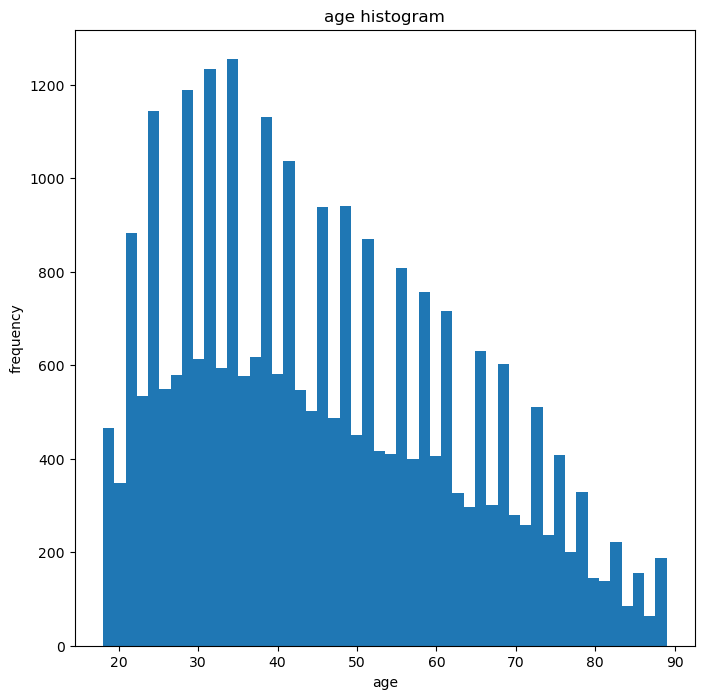

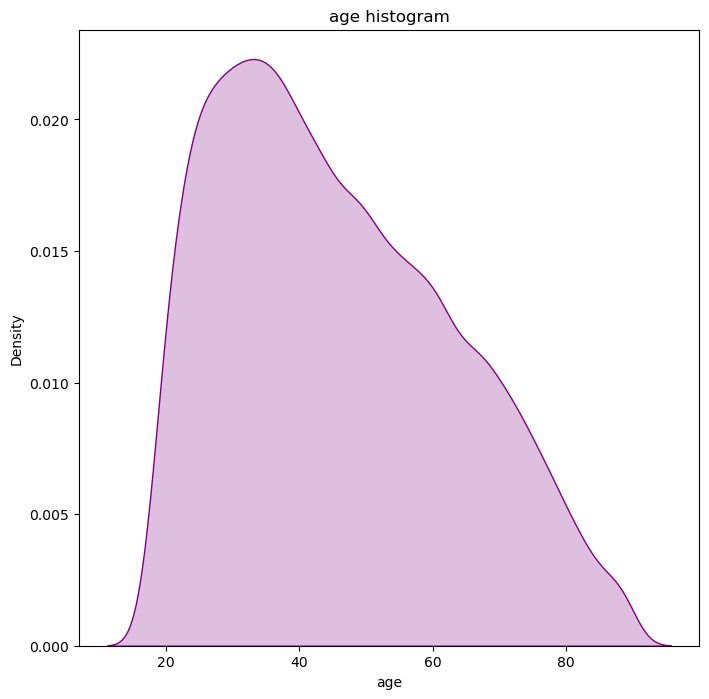

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
plt.hist(df["age"], bins = 50)
plt.xlabel("age")
plt.ylabel("frequency")
plt.title("age histogram")
plt.show()

plt.figure(figsize=(8,8))
sns.kdeplot(data = df, x = 'age', fill=True, color="purple")
plt.xlabel("age")
plt.title("age histogram")
plt.savefig("seaborn_density.pdf")
plt.show()




We will use plotninem (https://plotnine.org/) as our visualization tool for the first half of this lab. Create two different plots and identify the best looking plot you can to examine the `vocab` variable. Save the best looking plot as an appropriately-named PDF.

<ggplot: (640 x 480)>


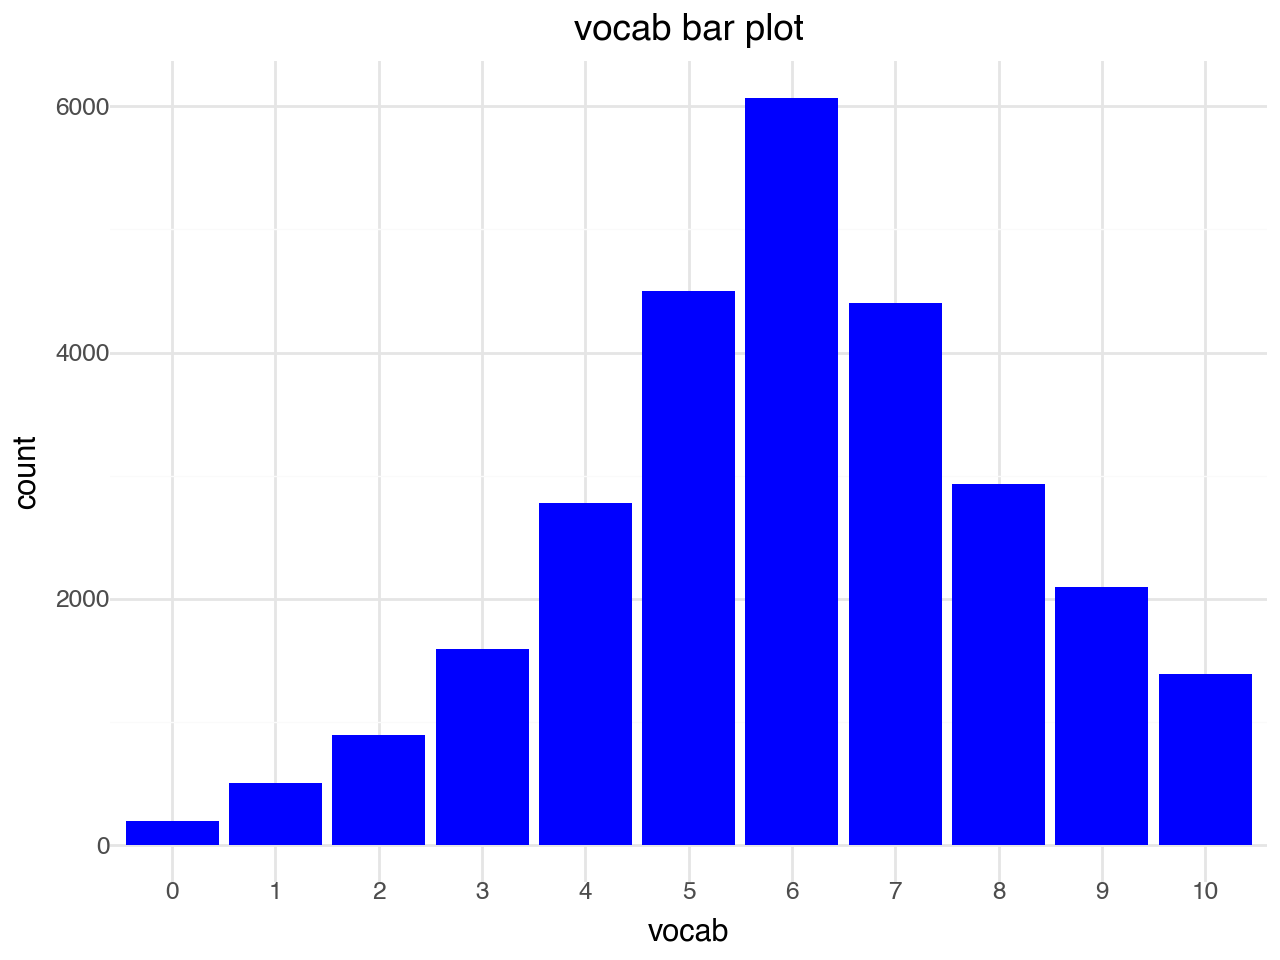

In [6]:
from plotnine import ggplot, aes, geom_bar, geom_point, labs, theme_minimal, ggsave, position_jitter

# Assume df is your GSSvocab DataFrame
# Ensure that vocab is treated as a categorical variable

df["vocab"] = df["vocab"].astype("category")

# ---- Plot 1: Bar Plot ----
bar_plot = (ggplot(df, aes(x='vocab')) +
            geom_bar(fill = "blue") + 
            labs(x = 'vocab', y = 'count', title = "vocab bar plot") +
            theme_minimal())


# Display the plots (in an interactive environment, these will render)
print(bar_plot)
bar_plot
# bar_plot.save(filename="vocab_bar_plot.png", width=10, height = 6, units='in', dpi = 300)

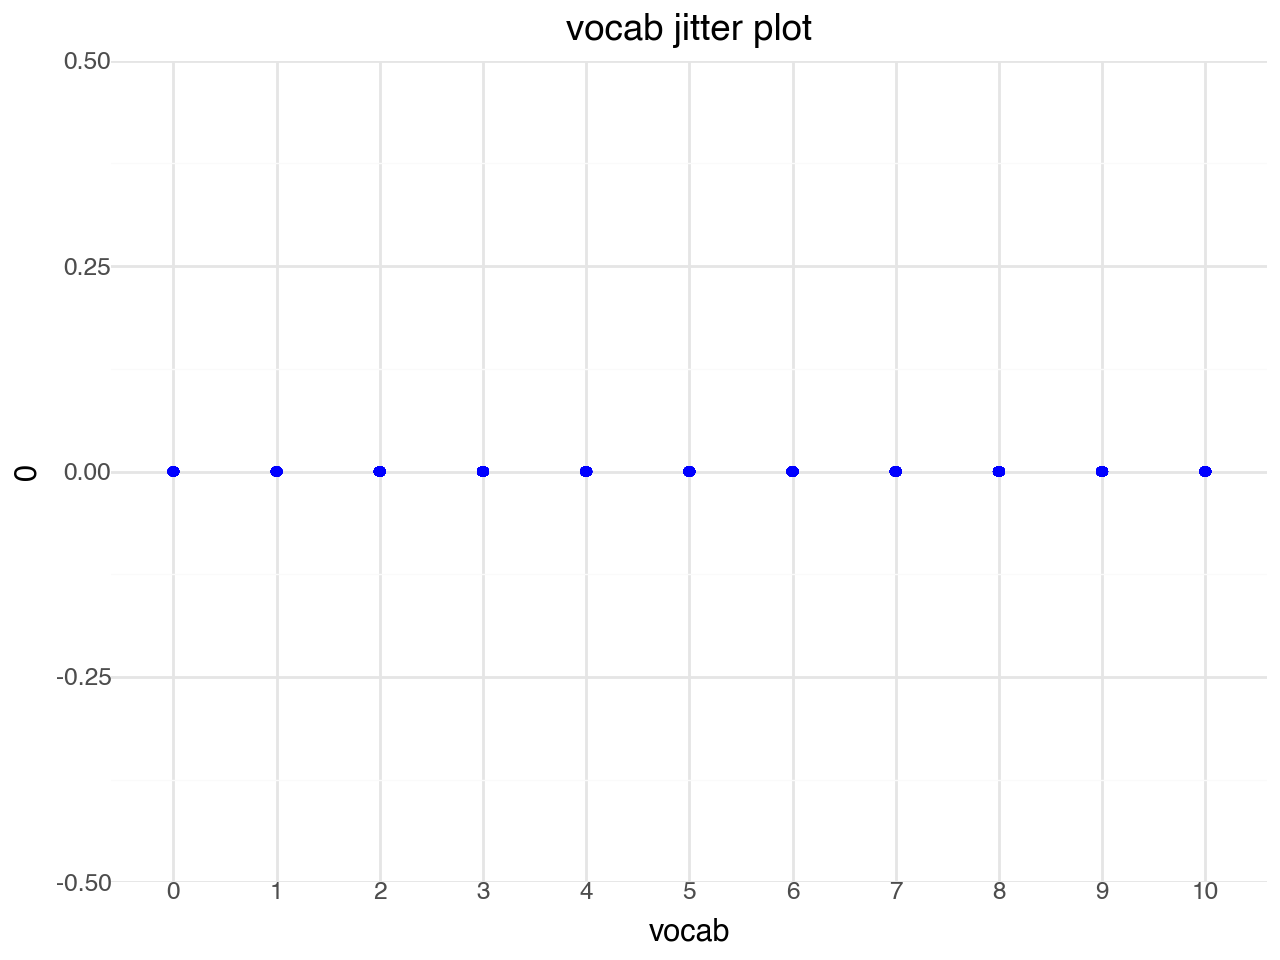

In [7]:
# Create a jitter plot for 'vocab'

jitter_plot = (ggplot(df, aes(x='vocab', y=0)) +
            geom_point(color = "blue", size = 1, position = position_jitter(width = .01, height=0)) + 
            labs(x = 'vocab', title = "vocab jitter plot") +
            theme_minimal())


jitter_plot

Create the best-looking plot you can to examine the `ageGroup` variable by `gender`. Does there appear to be an association? There are many ways to do this.

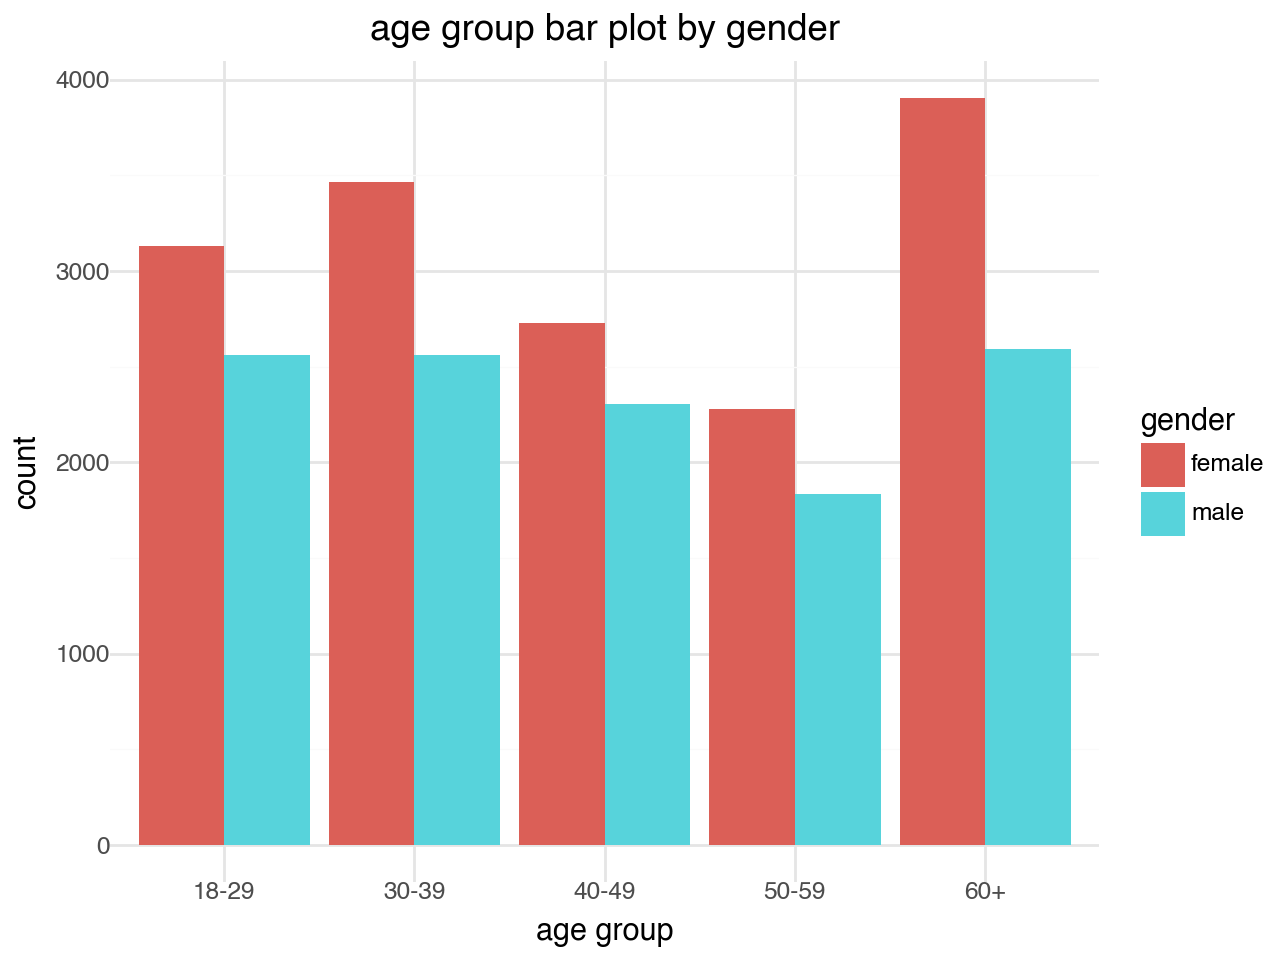

In [8]:
import pandas as pd
from plotnine import ggplot, aes, geom_violin, labs, theme_minimal

# Assume df is your DataFrame containing the columns 'ageGroup' and 'gender'.
# Make sure 'gender' is treated as a categorical variable:
df['gender'] = df['gender'].astype('category')

# Create a bar plot by switching the axes: 
bar_plot_age = (ggplot(df, aes(x='ageGroup', fill='gender')) +
            geom_bar(position = 'dodge') + 
            labs(x = 'age group', title = "age group bar plot by gender") +
            theme_minimal())


bar_plot_age

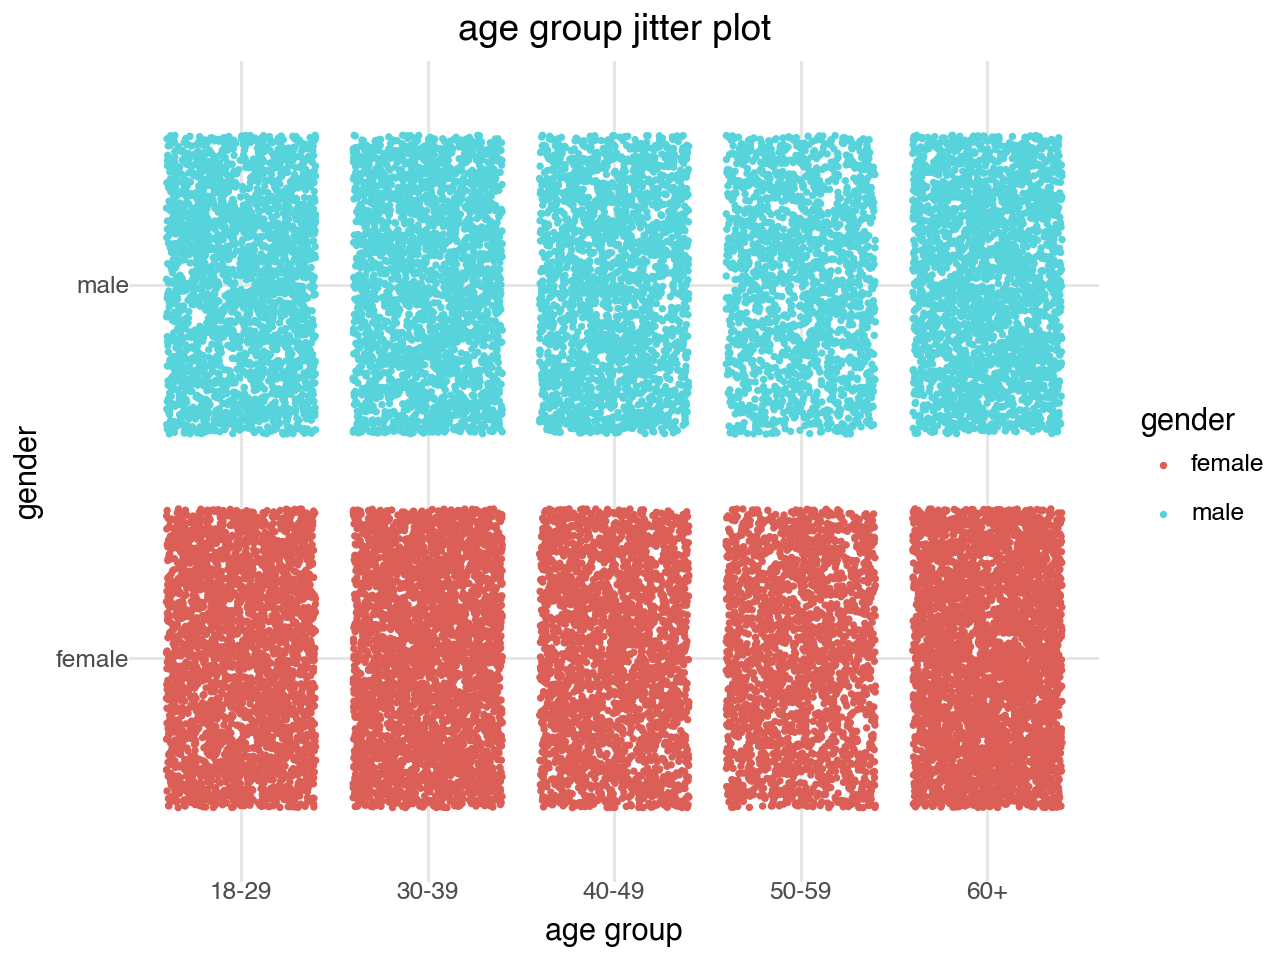

In [9]:
import pandas as pd
from plotnine import ggplot, aes, geom_jitter, labs, theme_minimal

# Assume df is your DataFrame containing the columns 'ageGroup' and 'gender'
# Ensure 'gender' is treated as a categorical variable
df['gender'] = df['gender'].astype('category')

jitter_plot = (ggplot(df, aes(x='ageGroup', y="gender", color='gender')) +
            geom_jitter(size = .5) + 
            labs(x = 'age group', title = "age group jitter plot") +
            theme_minimal())

jitter_plot

Create the best-looking plot you can to examine the `vocab` variable by `age`. Does there appear to be an association?

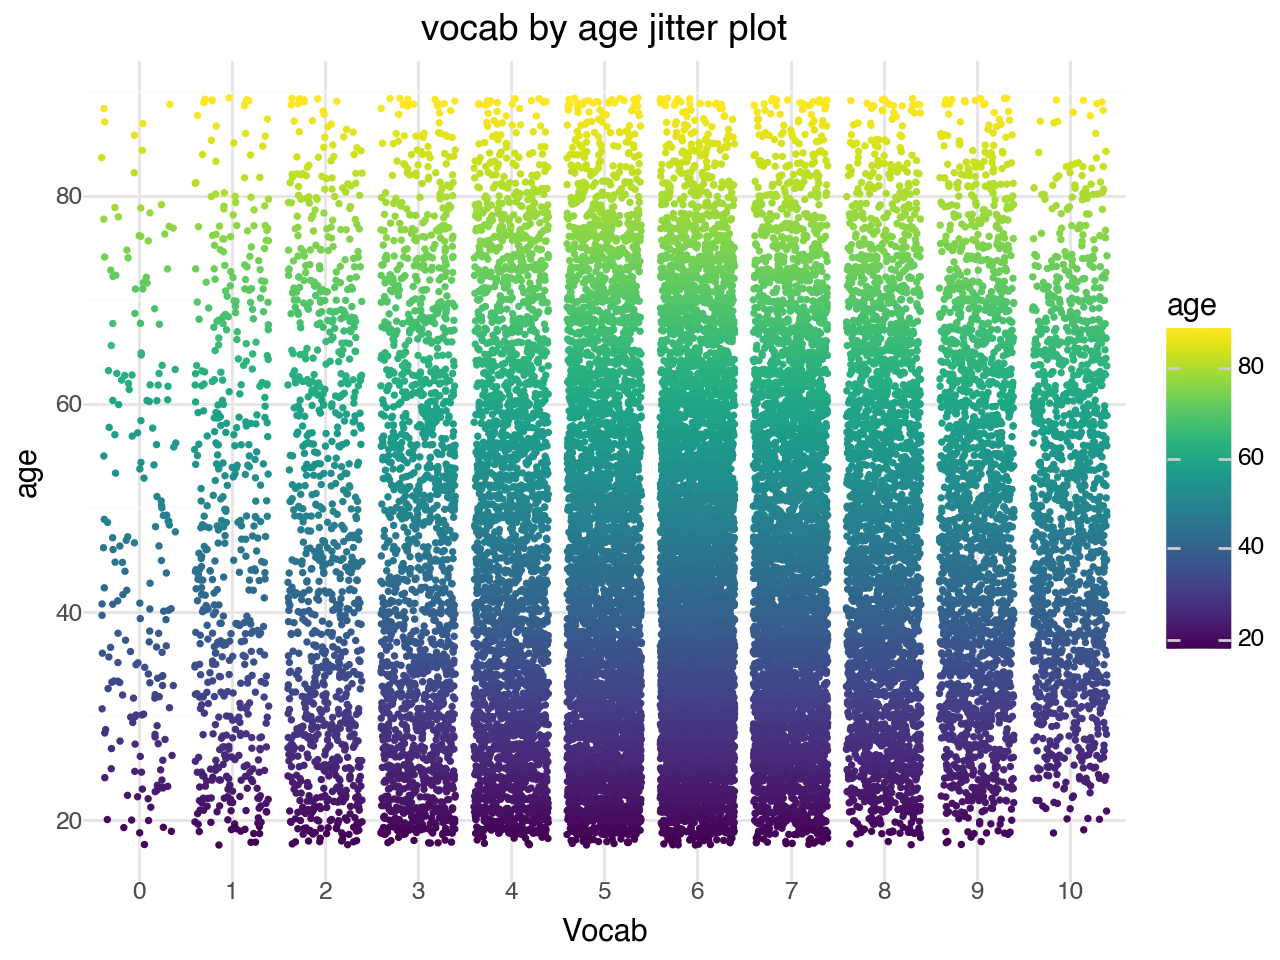

In [10]:
import pandas as pd
from plotnine import ggplot, aes, geom_jitter, labs, theme_minimal

# Create a jitter plot to examine the relationship between age and vocab
plot = (ggplot(df, aes(x="vocab", y="age", color="age")) +
        geom_jitter(size = .5) +
        labs(x="Vocab", title = "vocab by age jitter plot") +
        theme_minimal())

plot


Add an estimate of $f(x)$ using the smoothing geometry to the previous plot. Does there appear to be an association now? First install pygam by uncommenting and running the cell below and then fill in the missing block in the subsequent cell.

In [11]:
pip install pygam

Note: you may need to restart the kernel to use updated packages.


/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 16790 rows containing missing values.


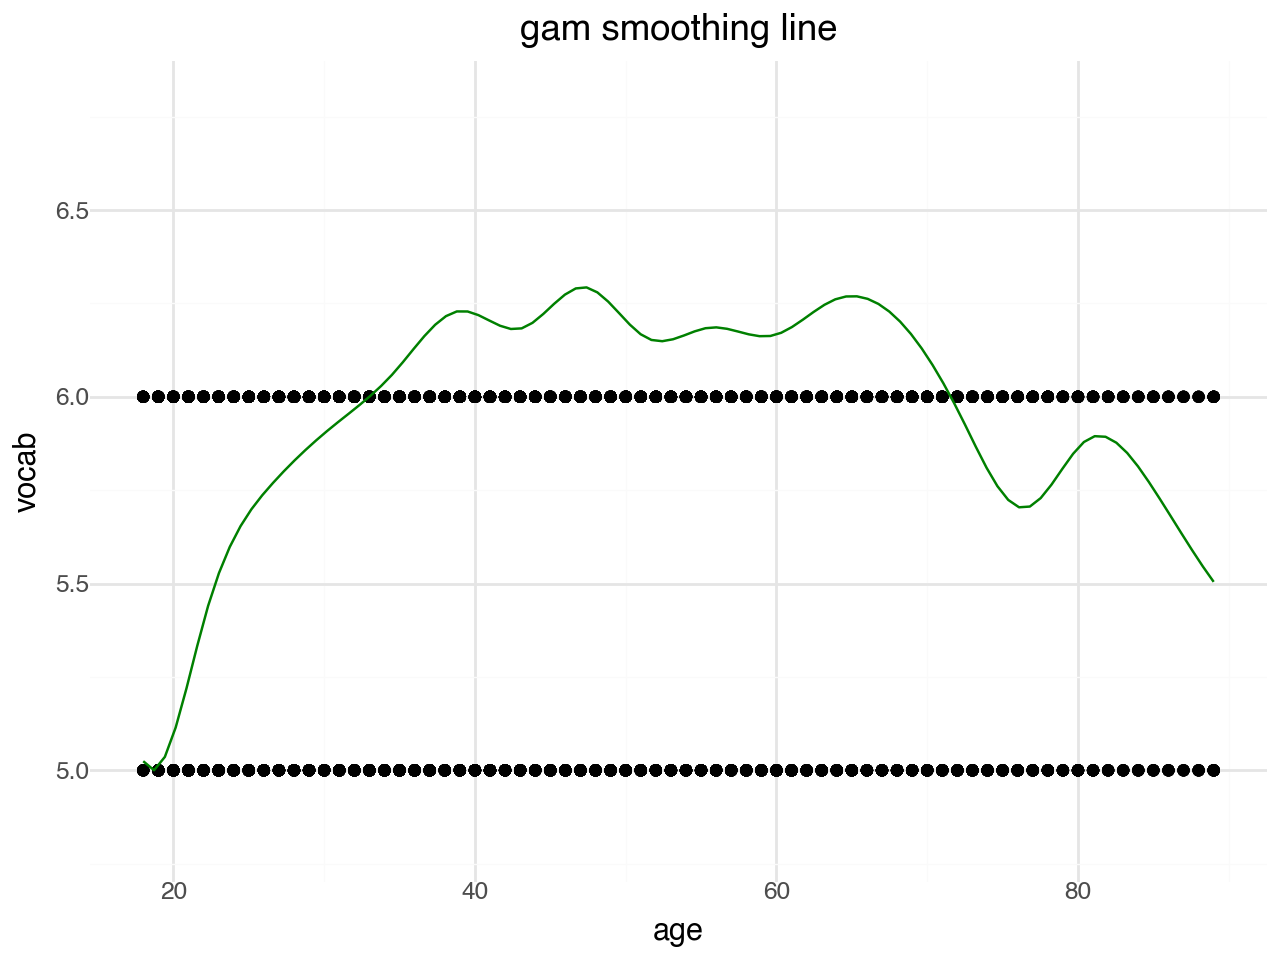

In [12]:
import pandas as pd
import numpy as np
from pygam import LinearGAM, s
from plotnine import ggplot, aes, geom_point, geom_line, labs, theme_minimal, scale_y_continuous

# Assume df is your DataFrame with 'age' and 'vocab' columns.
# Ensure 'vocab' is numeric (if it's not already)
df['vocab'] = pd.to_numeric(df['vocab'], errors='coerce')

# Fit a GAM model for vocab ~ s(age)
X = df[['age']].values  
y = df['vocab'].values
gam = LinearGAM(s(0)).fit(X, y)

# Create a grid of age values for prediction
age_grid = np.linspace(df['age'].min(), df['age'].max(), 100)
gam_preds = gam.predict(age_grid)

# Create a DataFrame with the predictions
gam_df = pd.DataFrame({
    'age': age_grid,
    'vocab': gam_preds
})

# Create the plot with y-axis limits between 4.8 and 6.8
plot = (ggplot(df, aes(x = 'age', y = 'vocab')) + 
        geom_point(alpha = .5) + 
        geom_line(data = gam_df, mapping=aes(x = 'age', y = 'vocab'), color="green") + 
        labs(title = 'gam smoothing line', x = 'age', y = 'vocab') +
        scale_y_continuous(limits=(4.8, 6.8)) +
        theme_minimal()
        )

plot


Using the plot from the previous question, create the best looking plot overloading with variable `gender`. Does there appear to be an interaction of `gender` and `age`?

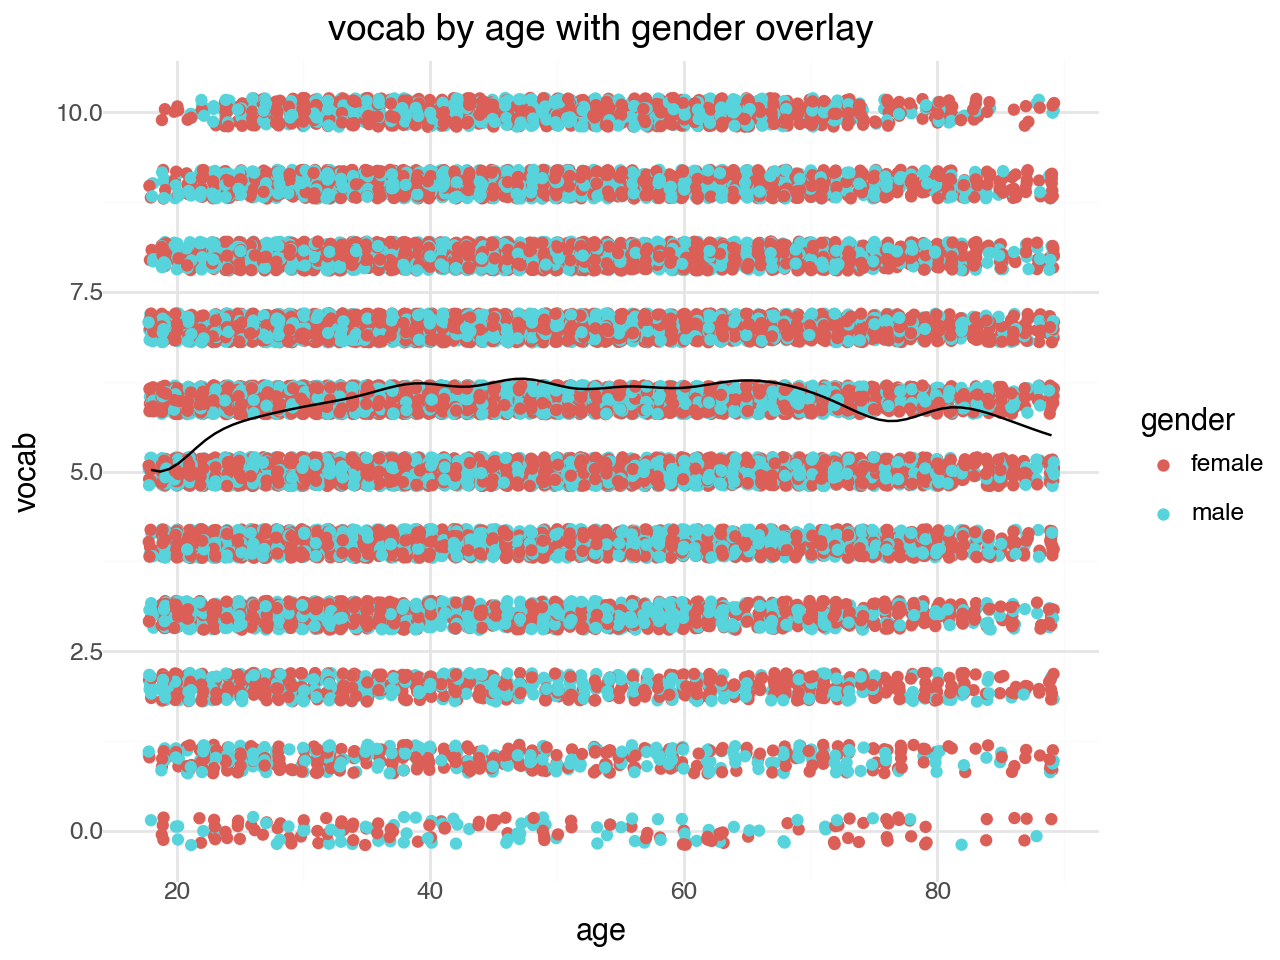

In [13]:
from plotnine import ggplot, aes, geom_jitter, geom_smooth, labs, theme_minimal

# Assume df is your DataFrame containing 'age', 'vocab', and 'gender'
# For example, df = pd.read_csv("GSSvocab.csv")
plot = (ggplot(df, aes(x = 'age', y = 'vocab')) + 
        geom_jitter(aes(color = 'gender'), width=0.2, height = 0.2) +
        geom_line(data = gam_df, mapping=aes(x = 'age', y = 'vocab'), color="black") + 
        labs(title = 'vocab by age with gender overlay', x = 'age', y = 'vocab') +
        
        theme_minimal()
        )

plot

Using the plot from the previous question, create the best looking plot overloading with variable `nativeBorn`. Does there appear to be an interaction of `nativeBorn` and `age`?

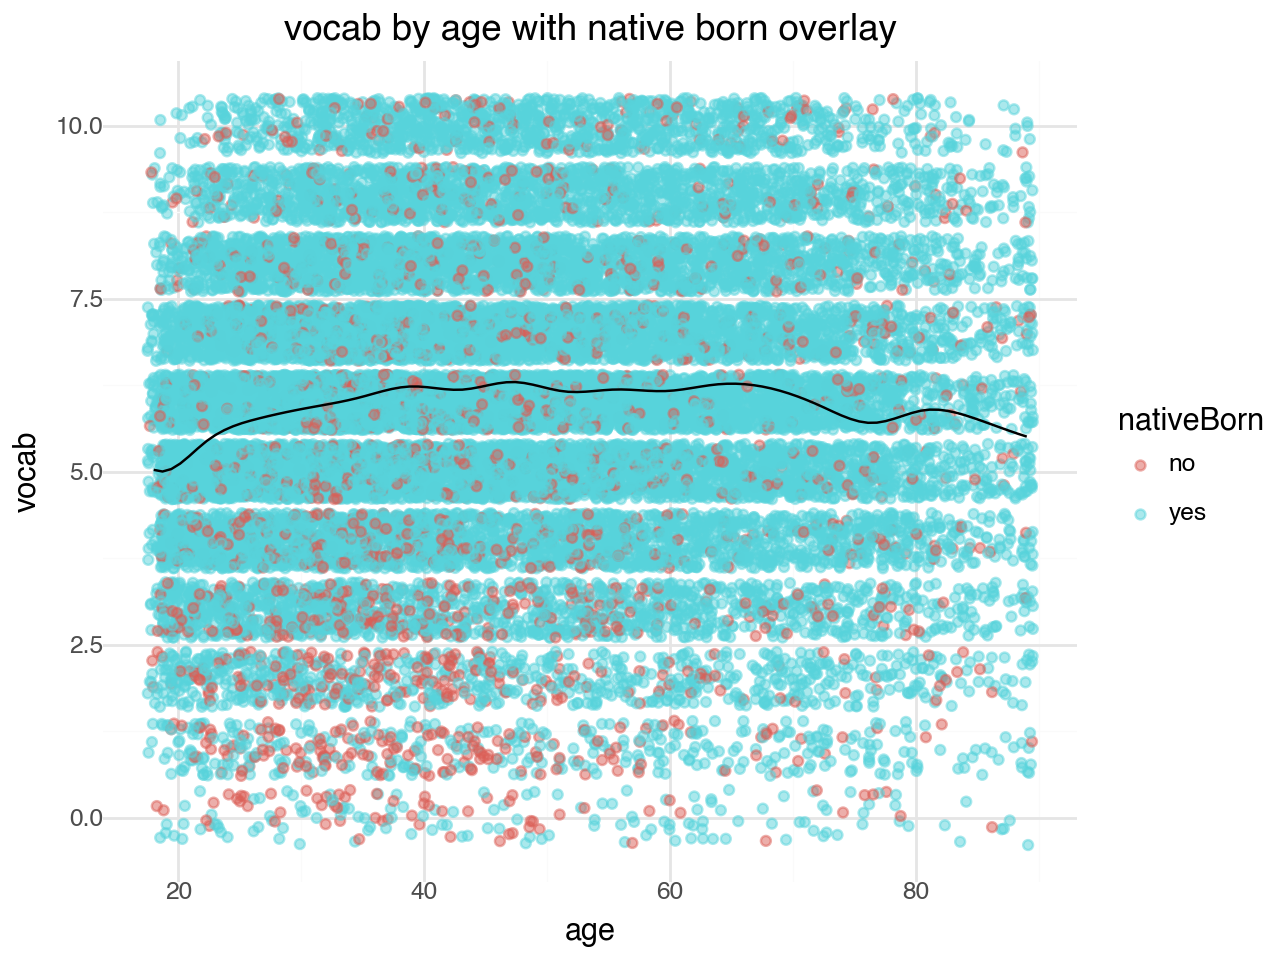

In [14]:
from plotnine import ggplot, aes, geom_jitter, geom_smooth, labs, theme_minimal

# Assume df is your GSSvocab DataFrame containing 'age', 'vocab', and 'nativeBorn'
plot = (ggplot(df, aes(x = 'age', y = 'vocab')) + 
        geom_jitter(aes(color = 'nativeBorn'), width=0.5, alpha = 0.5) +
        geom_line(data = gam_df, mapping=aes(x = 'age', y = 'vocab'), color="black") + 
        labs(title = 'vocab by age with native born overlay', x = 'age', y = 'vocab') +
        
        theme_minimal()
        )
plot


Create two different plots and identify the best-looking plot you can to examine the `vocab` variable by `educGroup`. Does there appear to be an association?

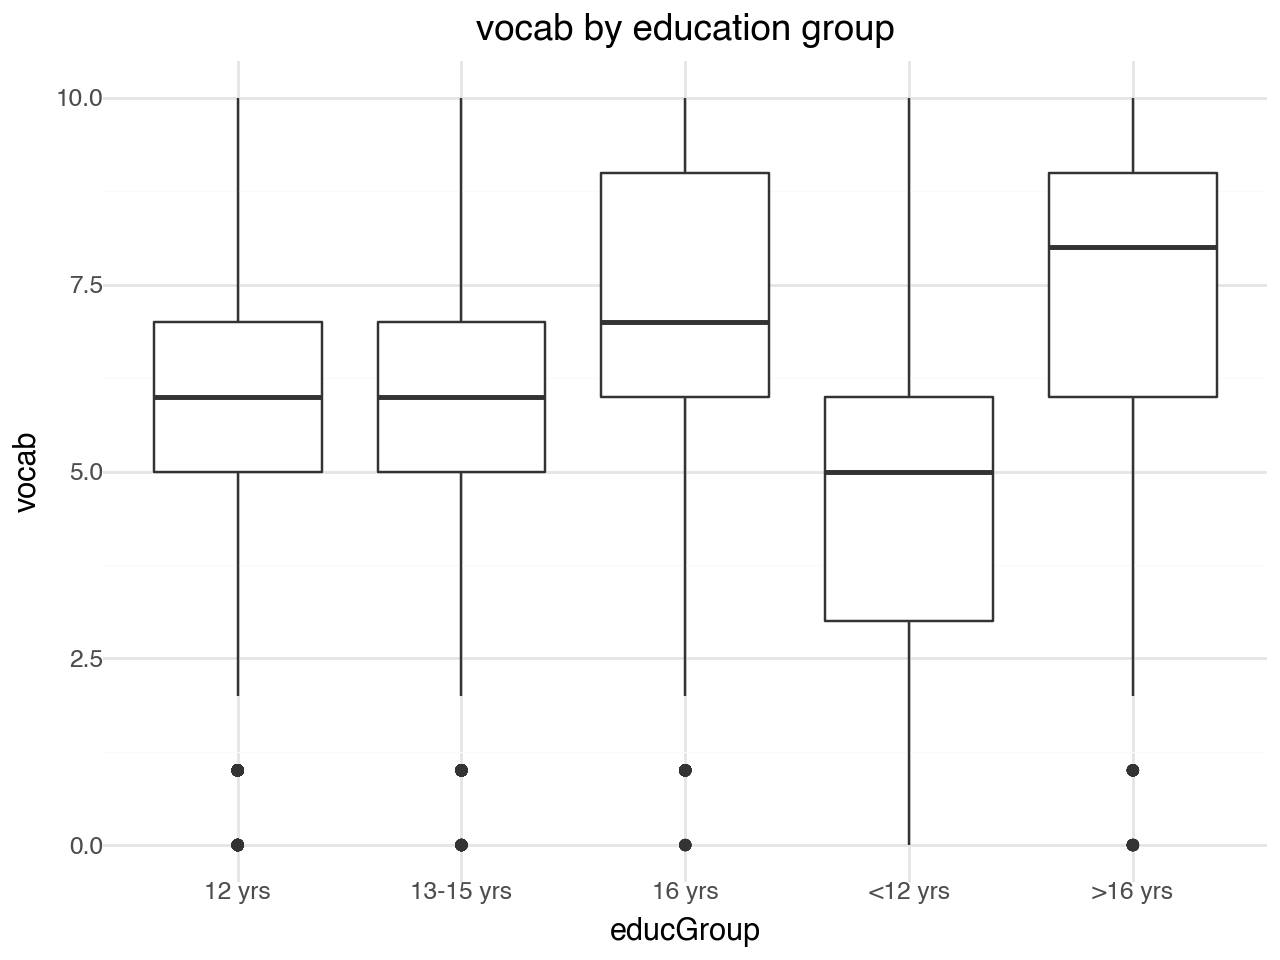

In [15]:
import pandas as pd
from plotnine import ggplot, aes, geom_boxplot, geom_density, labs, theme_minimal

# Assume df is your GSSvocab DataFrame containing the columns 'vocab' and 'educGroup'
# Ensure that 'educGroup' is treated as a categorical variable
df['educGroup'] = df['educGroup'].astype('category')

# ---- Plot 1: Boxplot of vocab by educGroup ----
boxplot = (ggplot(df, aes(x='educGroup', y='vocab')) +
           geom_boxplot() + 
           labs(title= 'vocab by education group') + 
           theme_minimal())
          
boxplot


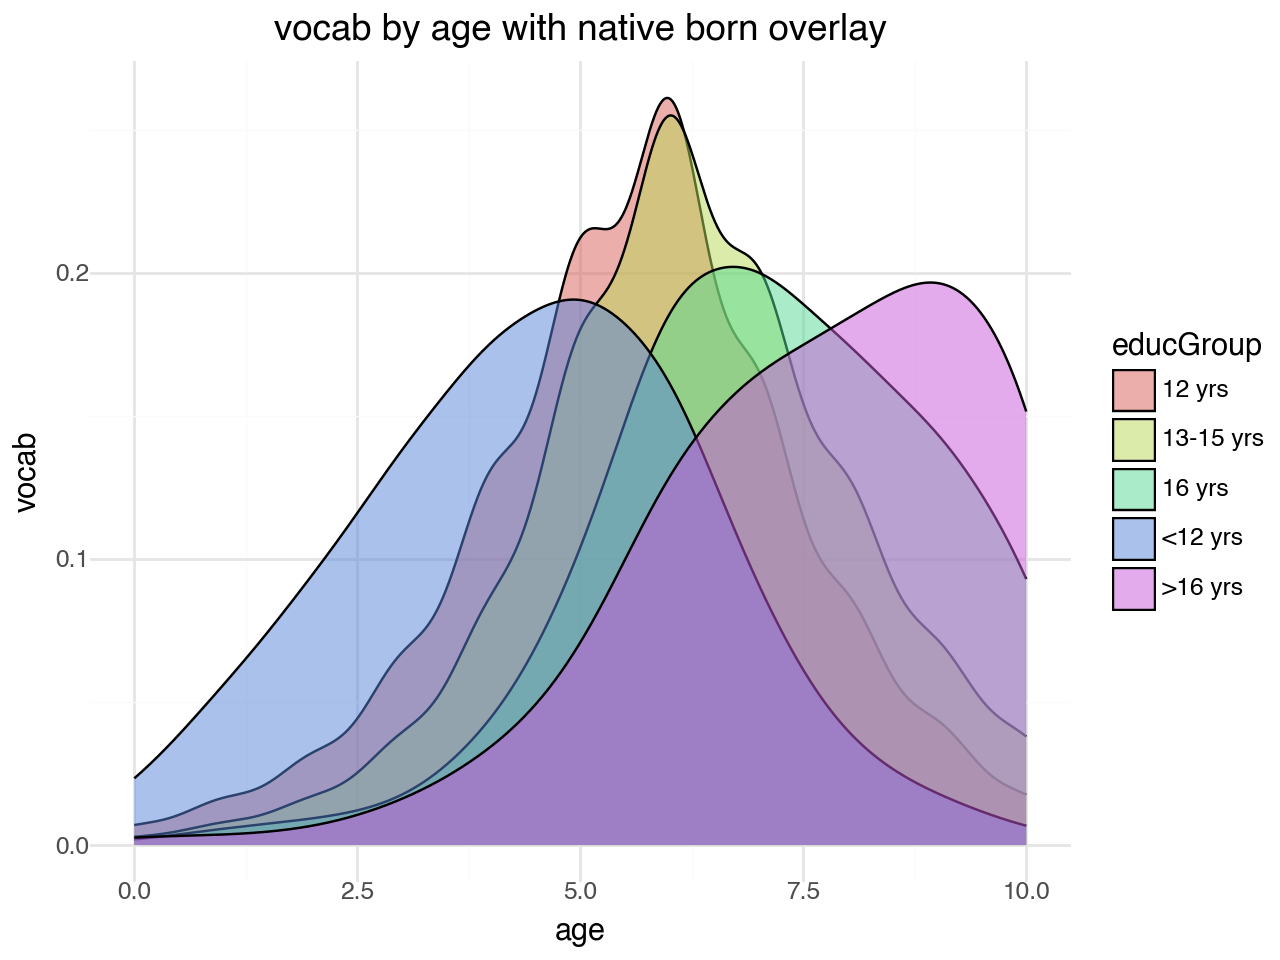

In [16]:
# ---- Plot 2: Density Plot of vocab with fill by educGroup ----
density_plot = (ggplot(df, aes(x = 'vocab', fill = 'educGroup')) + 
        geom_density(adjust = 2, alpha = 0.5) +
        
        labs(title = 'vocab by age with native born overlay', x = 'age', y = 'vocab') +
        
        theme_minimal()
        )
density_plot

Using the best-looking plot from the previous question, create the best looking overloading with variable `gender`. Does there appear to be an interaction of `gender` and `educGroup`?

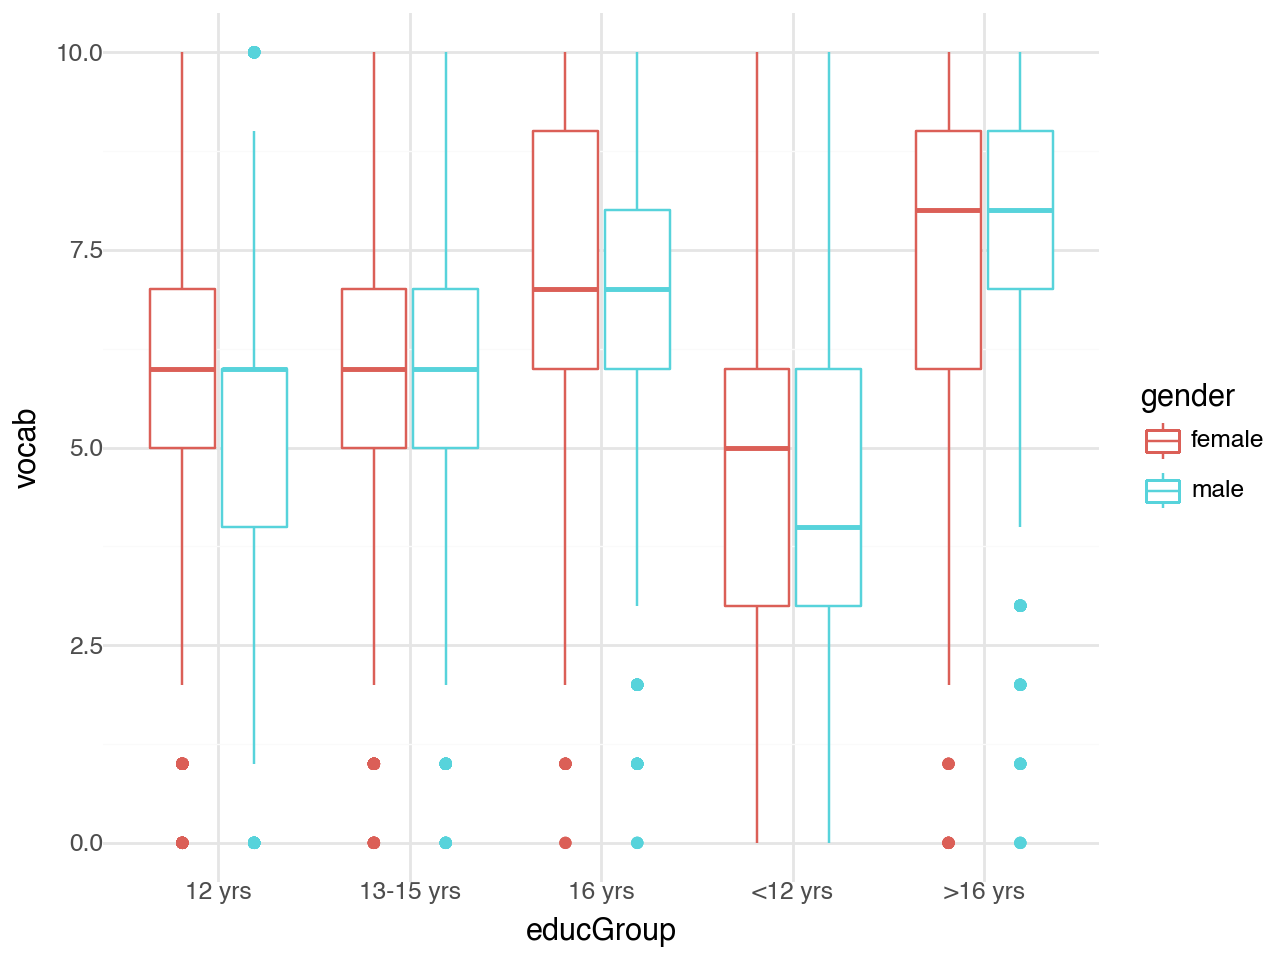

In [17]:
boxplot = (ggplot(df, aes(x='educGroup', y='vocab')) +
           geom_boxplot(aes(color='gender')) + 
           labs(title= '') + 
           theme_minimal())

boxplot

Using facets, examine the relationship between `vocab` and `ageGroup`. You can drop year level `(Other)`. Are we getting dumber?

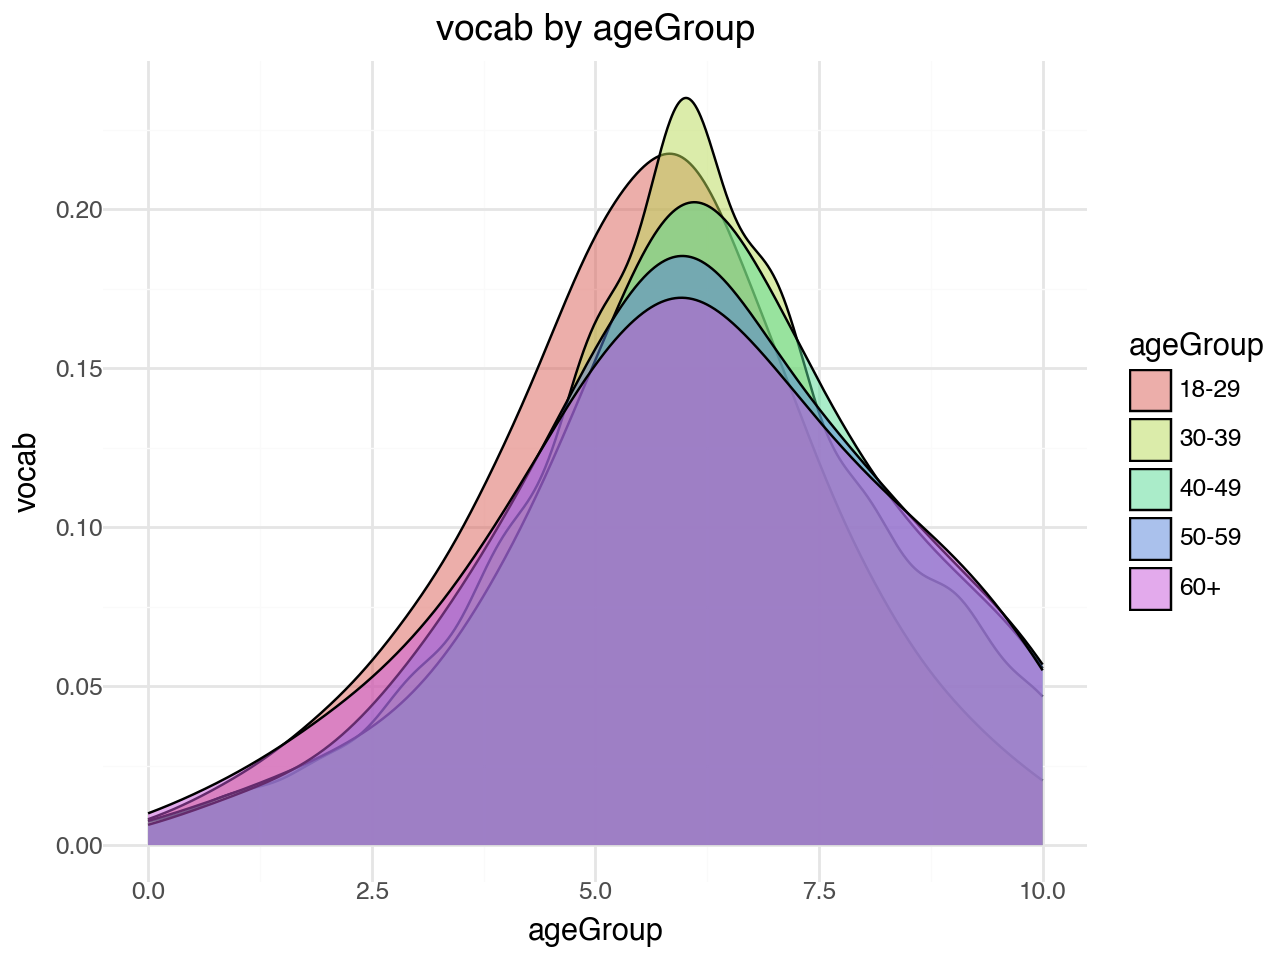

In [18]:
import pandas as pd
from plotnine import ggplot, aes, geom_density, facet_grid, labs, theme_minimal

# Assume df is your GSSvocab DataFrame.
# Drop the unwanted level "(Other)" from ageGroup.
df_subset = df[df['ageGroup'] != '(Other)']

# Create the density plot faceted by ageGroup.
plot = (ggplot(df_subset, aes(x = 'vocab', fill = 'ageGroup')) + 
        geom_density(adjust = 2, alpha = 0.5) +
        
        labs(title = 'vocab by ageGroup', x = 'ageGroup', y = 'vocab') +      
        theme_minimal()
        )

plot

#Logistic Regression

Let's consider the Pima Indians Diabetes dataset from 1988:

In [19]:
import statsmodels.api as sm

# Load the Pima.tr2 dataset from the MASS package
pima_dataset = sm.datasets.get_rdataset("Pima.tr2", package="MASS")
df = pima_dataset.data

# Display the first few rows
df


,npreg,glu,bp,skin,bmi,ped,age,type
0,5,86,68.0,28.0,30.2,0.364,24,No
1,7,195,70.0,33.0,25.1,0.163,55,Yes
2,5,77,82.0,41.0,35.8,0.156,35,No
3,0,165,76.0,43.0,47.9,0.259,26,No
4,0,107,60.0,25.0,26.4,0.133,23,No
...,...,...,...,...,...,...,...,...
295,0,125,68.0,NaN,24.7,0.206,21,No
296,6,92,92.0,NaN,19.9,0.188,28,No
297,3,141,NaN,NaN,30.0,0.761,27,Yes
298,0,73,NaN,NaN,21.1,0.342,25,No


Note the missing data. We will learn about how to handle missing data towards the end of the course. For now, replace, the missing data in the design matrix X with the mean of the feature x_dot,j. 

In [20]:

pima = pd.concat([pd.Series(1, index=df.index, name = 'intercept'), df], axis = 1)
pima['type'] = pima['type'].map({'Yes':1, 'No':0})
pima = pima.fillna(pima.mean())
print(pima.isna())


     intercept  npreg    glu     bp   skin    bmi    ped    age   type
0        False  False  False  False  False  False  False  False  False
1        False  False  False  False  False  False  False  False  False
2        False  False  False  False  False  False  False  False  False
3        False  False  False  False  False  False  False  False  False
4        False  False  False  False  False  False  False  False  False
..         ...    ...    ...    ...    ...    ...    ...    ...    ...
295      False  False  False  False  False  False  False  False  False
296      False  False  False  False  False  False  False  False  False
297      False  False  False  False  False  False  False  False  False
298      False  False  False  False  False  False  False  False  False
299      False  False  False  False  False  False  False  False  False

[300 rows x 9 columns]


Now let's fit a log-odds linear model of y=1 (type is "diabetic") on just the `glu` variable. Import minimize from scipy.optimize to fit the model.

In [21]:
import numpy as np
from scipy.optimize import minimize

y = pima['type'].values
X = pima['glu'].values

# Define the negative log-likelihood function for logistic regression
def neg_loglik(beta):
    beta0, beta1 = beta

    logit = 1/ (1 + np.exp(-(beta0+ beta1 * X)))
    epsilon = 1e-9
    ll = y * np.log(logit + epsilon) + (1 - y) * np.log(1-logit)
    return -np.sum(ll)

# Use minimize from SciPy to optimize the negative log-likelihood
result = minimize(neg_loglik, x0 = np.array([0,0]), method = 'BFGS')
print(result)

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 156.7359798010993
        x: [-5.835e+00  4.111e-02]
      nit: 11
      jac: [-3.815e-06 -5.512e-04]
 hess_inv: [[ 1.197e-04 -1.296e-06]
            [-1.296e-06  1.352e-06]]
     nfev: 60
     njev: 20


Extra Credit(+5): write a `fit_logistic_regression` function which takes in X, y and returns b which uses the optimization routine.

Run a logistic regression of y=1 (type is "diabetic") on just the `glu` variable using sm from statsmodels.api and report b_0, b_1.

In [22]:
import statsmodels.api as sm

# Add a constant column for the intercept
X = sm.add_constant(X)
# Fit the logistic regression model using y as the response and glu as the predictor
model = sm.Logit(y,X).fit()

# Extract the coefficients: b0 (intercept) and b1 (for glu)
coef = model.params

print("b0 (Intercept):", coef[0])
print("b1 (glu):", coef[1])

Optimization terminated successfully.
         Current function value: 0.522453
         Iterations 6
b0 (Intercept): -5.835259494801025
b1 (glu): 0.0411120027315075


Comment on how close the results from Statsmodels built in function was to your optimization call.

They are identical and their margins are small as when you look at intercept the difference is about 0.0002594  and the b1 is about 0.00002002731.

Interpret the value of b_1 from Statsmodels smf module.

One unit increase in x which is glucose resutls in a 0.04 increase in log-odds of having diabetes

Interpret the value of b_0 from Statsmodels smf module.

When x is 0, y is -5.84 which mean that if a person glucose level is 0, there is unlikey to have a diabetes as there is negative chance. 


Plot the probability of y=1 from the minimum value of `glu` to the maximum value of `glu`.

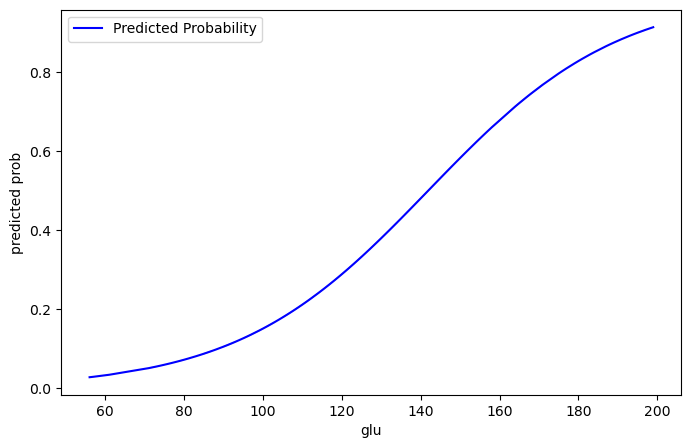

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new DataFrame with the glu values sorted from min to max
modify_data = df[['glu']].copy().sort_values(by = 'glu')

# Add the constant column so that newdata matches the model's predictors
modify_data = sm.add_constant(modify_data)

# Compute the predicted probabilities for y = 1 using the fitted model
modify_data['predicted_prob'] = model.predict(modify_data)

# Plot the predicted probability curve 
plt.figure(figsize = (8,5))
sns.lineplot(data = modify_data, x = 'glu', y = 'predicted_prob', color='blue', label = "Predicted Probability")
plt.xlabel("glu")
plt.ylabel("predicted prob")
plt.show()

Run a logistic regression of y=1 (type is "diabetic") on all variables using statsmodels sm module and report the b vector.

In [24]:
# Grab all the columns except 'type'
X = pima.iloc[:,:8]

# Fit the logistic regression model using y as the response and glu as the predictor
model = sm.Logit(y, X).fit()

# Report the estimated coefficients (b vector)
print("Coefficient vector (b):")
print(model.params)

Optimization terminated successfully.
         Current function value: 0.474728
         Iterations 6
Coefficient vector (b):
intercept   -8.867074
npreg        0.127339
glu          0.037081
bp          -0.007802
skin         0.000945
bmi          0.082250
ped          1.268481
age          0.009437
dtype: float64


Predict the probability of diabetes for someone with a blood sugar of 150.

In [25]:
import pandas as pd

# Compute means for the other variables
predictor_means = X[['npreg', 'bp', 'skin', 'bmi', 'ped', 'age']].mean()

# Create a new data point, using 150 for glu and the means for the others
glu_150 = pd.DataFrame({
    'constant': [1],
    'npreg': [predictor_means['npreg']],
    'glu': [150],
    'bp': [predictor_means['bp']],
    'skin': [predictor_means['skin']],
    'bmi': [predictor_means['bmi']],
    'ped': [predictor_means['ped']],
    'age': [predictor_means['age']]
})

# Predict using the fitted model
predicted_prob = model.predict(glu_150)

print("Predicted probability of diabetes for blood sugar 150:", round(predicted_prob.iloc[0], 4))

Predicted probability of diabetes for blood sugar 150: 0.5354


For 100 people with blood sugar of 150, what is the probability more than 75 of them have diabetes? (You may need to review 241 to do this problem).

In [26]:
from scipy.stats import binom

# Compute the probability that more than 75 of them have diabetes.
# This is: 1 - P(X <= 75)
n = 100
prob_more_than_75 = 1 - binom.cdf(75, n, predicted_prob)


print("Probability that more than 75 out of 100 people have diabetes:", prob_more_than_75)

Probability that more than 75 out of 100 people have diabetes: [3.00854504e-06]


Plot the in-sample log-odds predictions (y-axis) versus the real response values (x-axis).

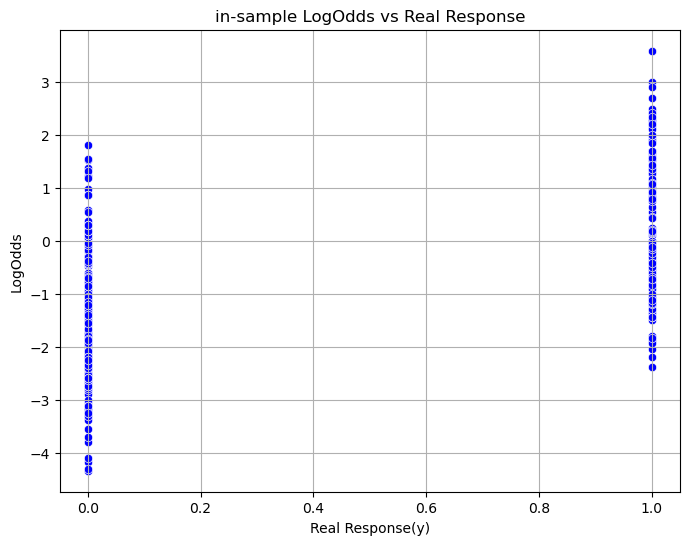

In [27]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Compute the in-sample log-odds predictions (linear predictor)
log_odds_predictions = X.dot(model.params)

# Create a DataFrame that holds the real responses and the log-odds predictions
df_plot = pd.DataFrame({
    'Real_Response': y,           # actual binary response values (0 or 1)
    'Predicted_LogOdds': log_odds_predictions
})

# Plot using seaborn's scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='Real_Response', y='Predicted_LogOdds', color='blue')
plt.xlabel("Real Response(y)")
plt.ylabel("LogOdds")
plt.title("in-sample LogOdds vs Real Response")
plt.grid(True)
plt.show()

Plot the in-sample probability predictions (y-axis) versus the real response values (x-axis).

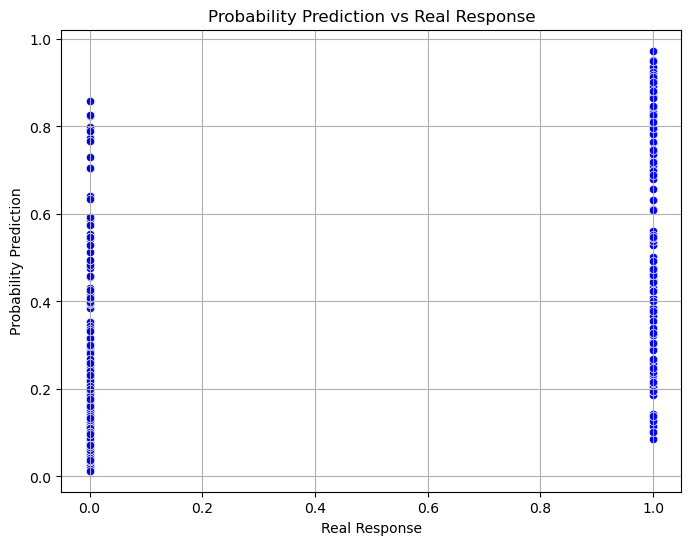

In [28]:
# Compute predicted probabilities using your fitted logistic regression model.
# X is your original design matrix with the intercept
predicted_probs = model.predict(X)
# Create a DataFrame that holds the actual binary responses and the predicted probabilities.
df_plot = pd.DataFrame({
    'Real_Response': y,                 # Actual response values (0 or 1)
    'Predicted_Probability': predicted_probs
})

# Plot using seaborn's scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='Real_Response', y='Predicted_Probability', color='blue')
plt.xlabel("Real Response")
plt.ylabel("Probability Prediction")
plt.title("Probability Prediction vs Real Response")
plt.grid(True)
plt.show()


Comment on how well you think the logistic regression performed in-sample.

Since many predictions for both y = 0 and y = 1 were spread out a lot, logistic regression didn’t do very well on the training data

Calculate the in-sample Brier score.

In [29]:
import numpy as np

# Compute the in-sample Brier score
# Brier Score = (1/n) * sum( (y - predicted_prob)^2 )
brier_score = np.mean((y - predicted_probs)**2)

print("In-sample Brier score:", brier_score)

In-sample Brier score: 0.158580893096537


Calculate the in-sample log-scoring rule.

In [30]:
import numpy as np

# To avoid taking log(0), add a small constant epsilon
epsilon = 1e-9

# Calculate the negative average log-likelihood
# Also known as the log scoring rule
log_score = -np.mean(
    y * np.log(predicted_probs + epsilon) + (1 - y) * np.log(1 - predicted_probs + epsilon)
)

print("In-sample log scoring rule:", log_score)

In-sample log scoring rule: 0.4747279313471582


Run a probit regression of y=1 (type is "diabetic") on all variables and report the b vector.

In [31]:
# Grab all the columns except 'type'
X = pima.iloc[:,:8]

# Fit the probit regression model using sm.Probit
model = sm.Probit(y, X).fit()

# Report the estimated coefficient vector (b)
print("Coefficient vector (b):")
print(model.params)

Optimization terminated successfully.
         Current function value: 0.472149
         Iterations 6
Coefficient vector (b):
intercept   -5.362714
npreg        0.075344
glu          0.022262
bp          -0.004295
skin         0.000222
bmi          0.050129
ped          0.741756
age          0.005967
dtype: float64


Does the weight estimates here in the probit fit have different signs than the weight estimates in the logistic fit? What does that mean?

The weight estimates in the probit and logit fits have the same signs. This means both models agree on the direction of each variable’s effect on the outcome, even though they use different link functions.

Plot the in-sample probability predictions (y-axis) versus the real response values (x-axis).

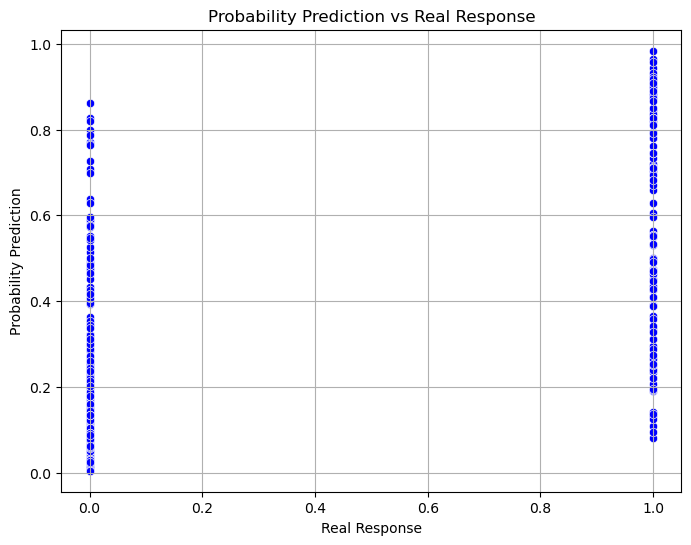

In [32]:
# Compute predicted probabilities using your fitted logistic regression model.
probit_probs = model.predict(X)  # X is your original design matrix with the intercept

# Create a DataFrame that holds the actual binary responses and the predicted probabilities.
df_plot = pd.DataFrame({
    'Real_Response': y,                 # Actual response values (0 or 1)
    'Predicted_Probability': probit_probs
})

# Plot using seaborn's scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='Real_Response', y='Predicted_Probability', color='blue')
plt.xlabel("Real Response")
plt.ylabel("Probability Prediction")
plt.title("Probability Prediction vs Real Response")
plt.grid(True)
plt.show()

Calculate the in-sample Brier score.

In [33]:
import numpy as np

# Compute the in-sample Brier score
# Brier Score = (1/n) * sum( (y - predicted_prob)^2 )
Probit_brier_score = np.mean((y - probit_probs)**2)

print("In-sample Brier score:", Probit_brier_score)

In-sample Brier score: 0.15821153000656532


Calculate the in-sample log-scoring rule.

In [34]:
import numpy as np

# To avoid taking log(0), add a small constant epsilon
epsilon = 1e-9

# Calculate the negative average log-likelihood
# Also known as the log scoring rule
Probit_log_score = -np.mean(
    y * np.log(probit_probs+ epsilon) + (1 - y) * np.log(1 - probit_probs + epsilon)
)

print("In-sample log scoring rule:", Probit_log_score)

In-sample log scoring rule: 0.47214923004601966


Which model did better in-sample?

Probit does marginally better in-sample probit is closer to 0 with some decimal points

Compare both models oos using the Brier score and a test set with 1/3 of the data.

In [35]:
from sklearn.model_selection import train_test_split

# Grab all the columns except 'type'
X = pima.iloc[:,:8]
y = pima['type'].values

# Split the data: 2/3 training, 1/3 test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1/5, random_state=42
)

# Fit the logistic regression (logit) model on the training set
logit_model = sm.Logit(y_train, X_train).fit()

# Fit the probit model on the training set
probit_model = sm.Probit(y_train, X_train).fit()

# Predict probabilities on the test set for both models
logit_prediction = logit_model.predict(X_test)
probit_prediction = probit_model.predict(X_test)

# Calculate the out-of-sample Brier score for each model
# Brier Score = mean( (actual - predicted)^2 )
brier_logit = np.mean((y_test - logit_prediction)**2)
brier_probit = np.mean((y_test - probit_prediction)**2)

print("Out-of-sample Brier Score (Logit):", brier_logit)
print("Out-of-sample Brier Score (Probit):", brier_probit)

Optimization terminated successfully.
         Current function value: 0.474688
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.472408
         Iterations 6
Out-of-sample Brier Score (Logit): 0.16380654364671657
Out-of-sample Brier Score (Probit): 0.1622874718089002


Which model did better oos?

Probit model is slightly better than the logit model as probit's brier score is closer to 0